In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mostra_img(imagem):
  fig = plt.gcf()
  fig.set_size_inches(18, 6)
  plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB), cmap='gray')
  plt.axis('off')
  plt.show()

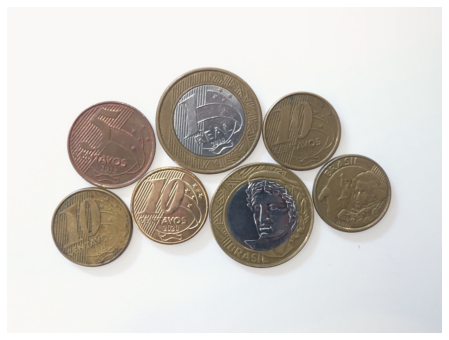

In [3]:
img = cv2.imread("/content/moedas03.jpg")
mostra_img(img)

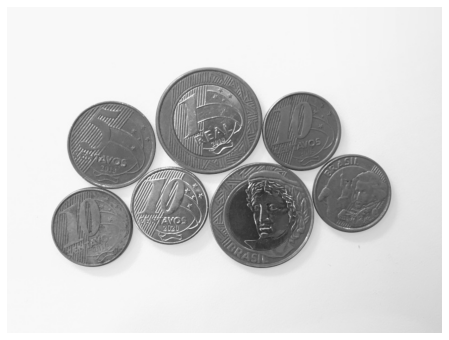

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mostra_img(gray)

174.0


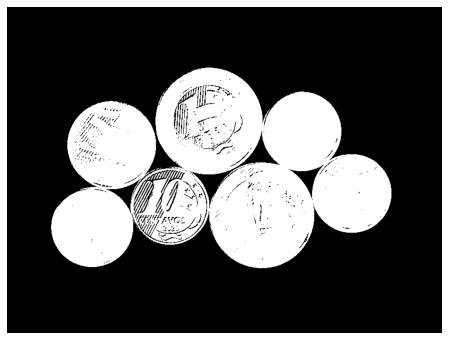

In [5]:
val, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
print(val)
mostra_img(thresh)

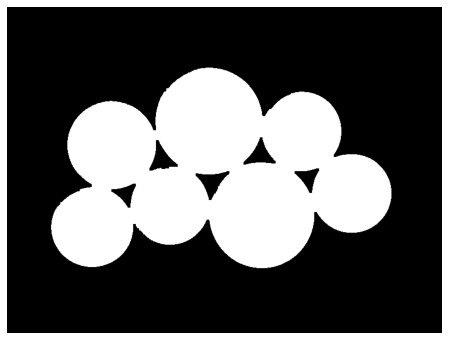

In [6]:
dilatacao = cv2.dilate(thresh, np.ones((3,3), np.uint8), iterations=2)
seg = cv2.erode(dilatacao, np.ones((3,3), np.uint8), iterations=2)
mostra_img(seg)

In [7]:
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.segmentation import watershed

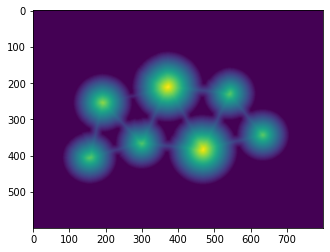

In [8]:
dist = ndi.distance_transform_edt(seg)
plt.imshow(dist)

In [9]:
local_max = peak_local_max(dist, indices=False, min_distance=20, labels=seg)
local_max

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  """Entry point for launching an IPython kernel.


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [10]:
markers = ndi.label(local_max, structure=np.ones((3,3)))[0]
print(markers)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [11]:
labels = watershed(-dist, markers, mask=seg)

In [12]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [13]:
labels.shape

(600, 800)

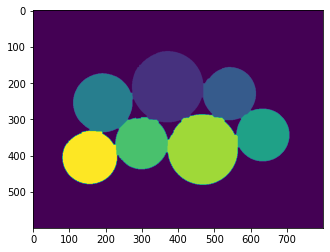

In [14]:
plt.imshow(labels);

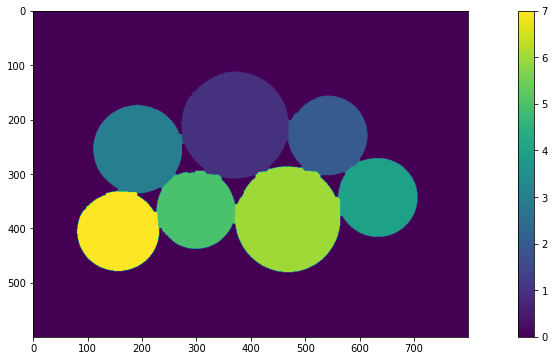

In [15]:
fig = plt.gcf()
fig.set_size_inches(18,6)
plot = plt.imshow(labels)
plt.colorbar(plot);

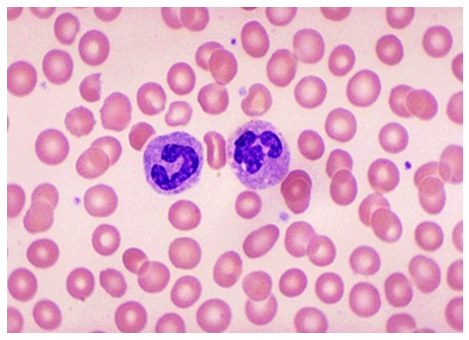

In [16]:
img = cv2.imread('/content/rbc.jpg')
mostra_img(img)

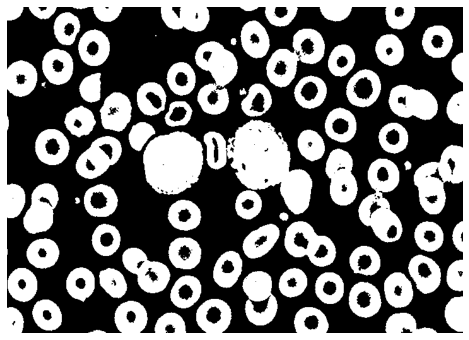

In [17]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
mostra_img(thresh)

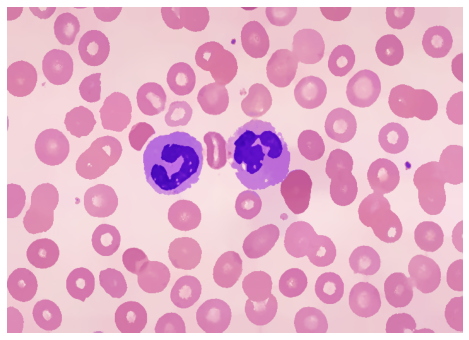

In [18]:
filtro = cv2.pyrMeanShiftFiltering(img, 20, 40)
mostra_img(filtro)

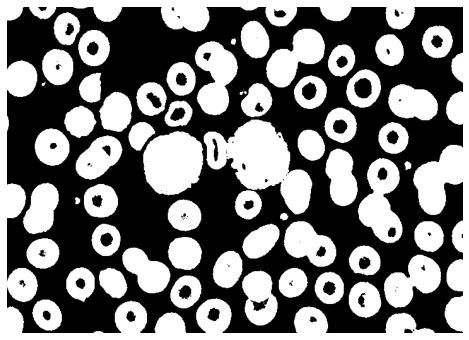

In [19]:
gray = cv2.cvtColor(filtro, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
mostra_img(thresh)

In [20]:
def preenche_buracos(img_thresh, limiar = 1000):

  #detectar os contornos
  #verificar quais contornos estão abaixo do limiar
  #adicionar os contornos abaixo do limiar em uma lista
  #preencher contornos pequenos

  contornos, _ = cv2.findContours(img_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  buracos = []

  for con in contornos:
    area = cv2.contourArea(con)
    if area < limiar:
      buracos.append(con)

  cv2.drawContours(img_thresh, buracos, -1, 255, -1)
  return img_thresh



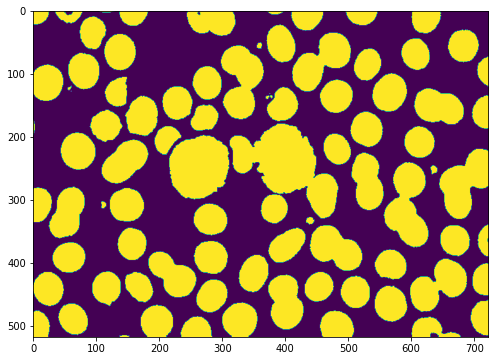

In [24]:
seg = preenche_buracos(thresh)
fig = plt.gcf()
fig.set_size_inches(18, 6)
plt.imshow(seg);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  This is separate from the ipykernel package so we can avoid doing imports until


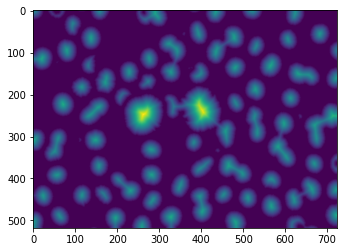

In [25]:
dist = ndi.distance_transform_edt(seg)
plt.imshow(dist);
local_max = peak_local_max(dist, indices=False, min_distance=20, labels=seg)

In [26]:
markers = ndi.label(local_max, structure=np.ones((3, 3)))[0]

In [27]:
labels = watershed(-dist, markers, mask=seg)
print("Segmentos únicos encontrados: {}".format(len(np.unique(labels)) -1))

Segmentos únicos encontrados: 83


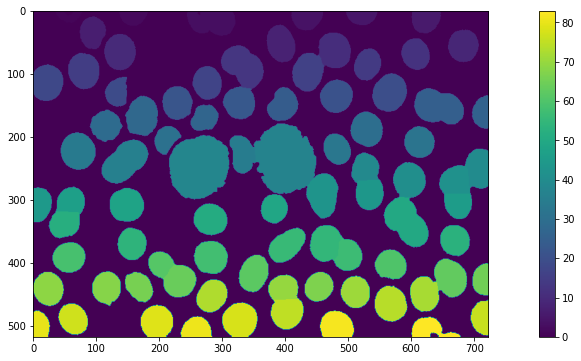

In [28]:
fig = plt.gcf()
fig.set_size_inches(18, 6)
plot = plt.imshow(labels)
plt.colorbar(plot);

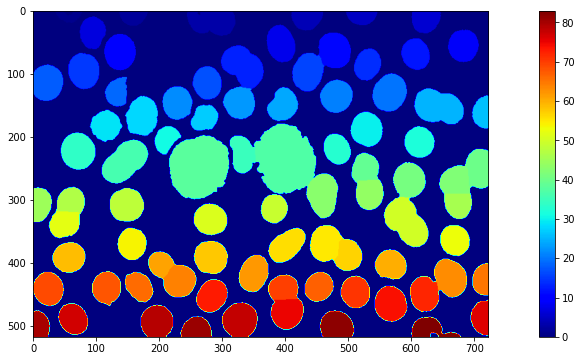

In [29]:
fig = plt.gcf()
fig.set_size_inches(18, 6)
plot = plt.imshow(labels, cmap='jet')
plt.colorbar(plot);